In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [2]:
df_path = 'https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv'

In [4]:
df = pd.read_csv(df_path, parse_dates=[0], index_col='DATE')

df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


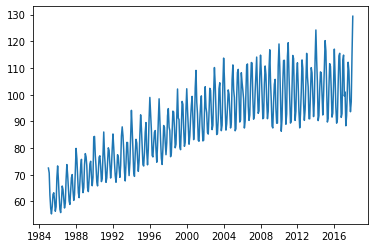

In [6]:
plt.plot(df.index,df['Value'])

In [7]:
resultados = seasonal_decompose(df)

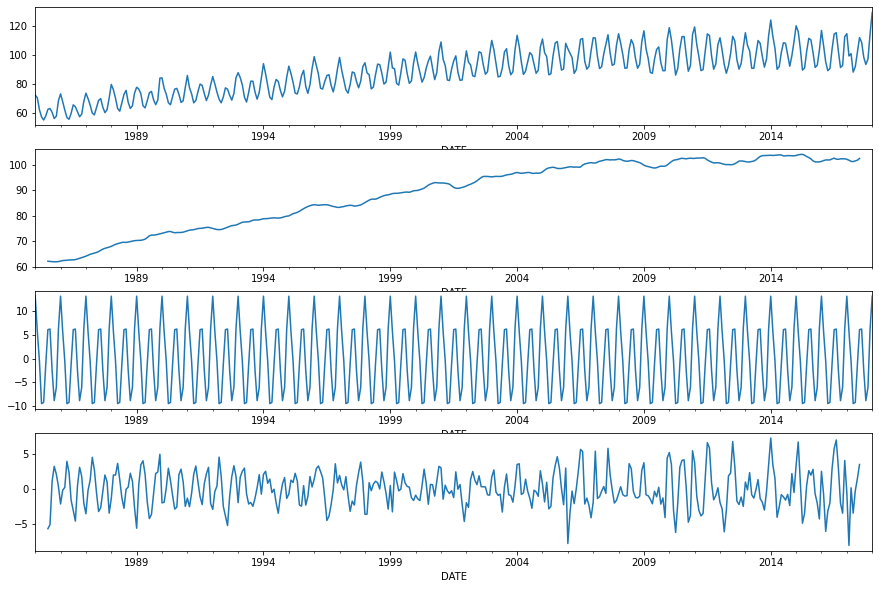

In [8]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.show()

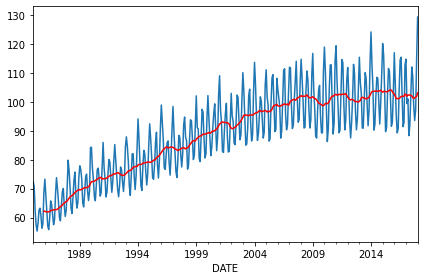

In [10]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax,legend=False)
ma.plot(ax=ax,legend=False,color='r')
plt.tight_layout()
plt.show()

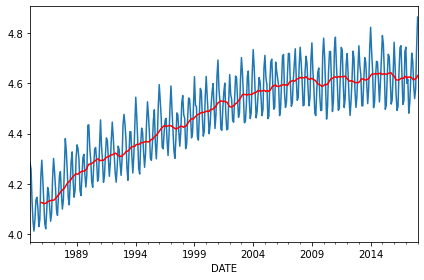

In [11]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax,legend=False)
ma_log.plot(ax=ax,legend=False,color='r')
plt.tight_layout()
plt.show()

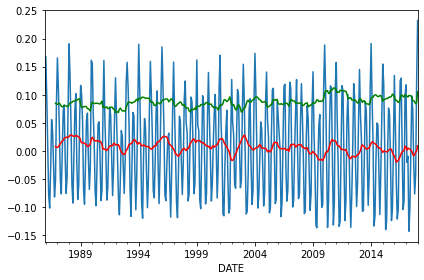

In [12]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax,legend=False)
ma_s.plot(ax=ax,legend=False,color='r')
std.plot(ax=ax,legend=False,color='g')
plt.tight_layout()
plt.show()

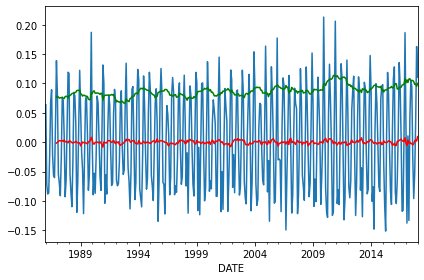

In [13]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax,legend=False)
ma_diff.plot(ax=ax,legend=False,color='r')
std_diff.plot(ax=ax,legend=False,color='g')
plt.tight_layout()
plt.show()

In [9]:
# ARIMA - (AR): Autoregressivo, I: Integrado, (MA): Média móvel

# A(x,y,z) -> ACF, PACF

In [14]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

In [16]:
# 5% ACF

# 1.96/sqrt(N-d) -> N: Numero de pontos do df, d: Numero de vezes que diferenciamos o df

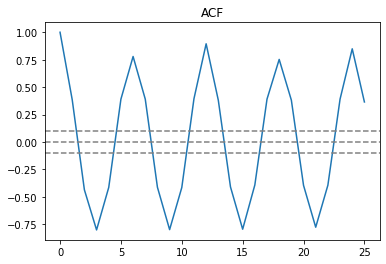

In [17]:
plt.plot(lag_acf)

plt.axhline(y = -1.96/(np.sqrt(len(df_diff)-1)), linestyle='--',color='gray')

plt.axhline(y = 0, linestyle='--',color='gray')

plt.axhline(y = 1.96/(np.sqrt(len(df_diff)-1)), linestyle='--',color='gray')

plt.title('ACF')

plt.show()

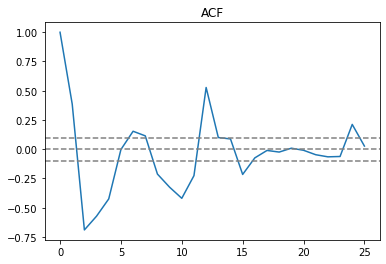

In [18]:
plt.plot(lag_pacf)

plt.axhline(y = -1.96/(np.sqrt(len(df_diff)-1)), linestyle='--',color='gray')

plt.axhline(y = 0, linestyle='--',color='gray')

plt.axhline(y = 1.96/(np.sqrt(len(df_diff)-1)), linestyle='--',color='gray')

plt.title('ACF')

plt.show()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

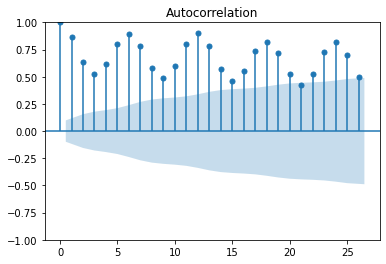

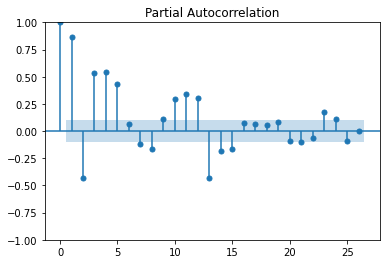

In [22]:
plot_acf(df.Value)
plot_pacf(df.Value)
plt.show()